# Install Required Libraries

In [ ]:
!pip install scipy


# Import Libraries

In [ ]:
import numpy as np
import scipy.io
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Load the Dataset (.mat File)

In [ ]:
from google.colab import files

#uploaded = files.upload()  # Upload your .mat file manually

data = scipy.io.loadmat("/content/mnist-original.mat")


# Display the Dataset

Shape of X (images): (70000, 784)
Shape of y (labels): (70000,)

Last 20 labels: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


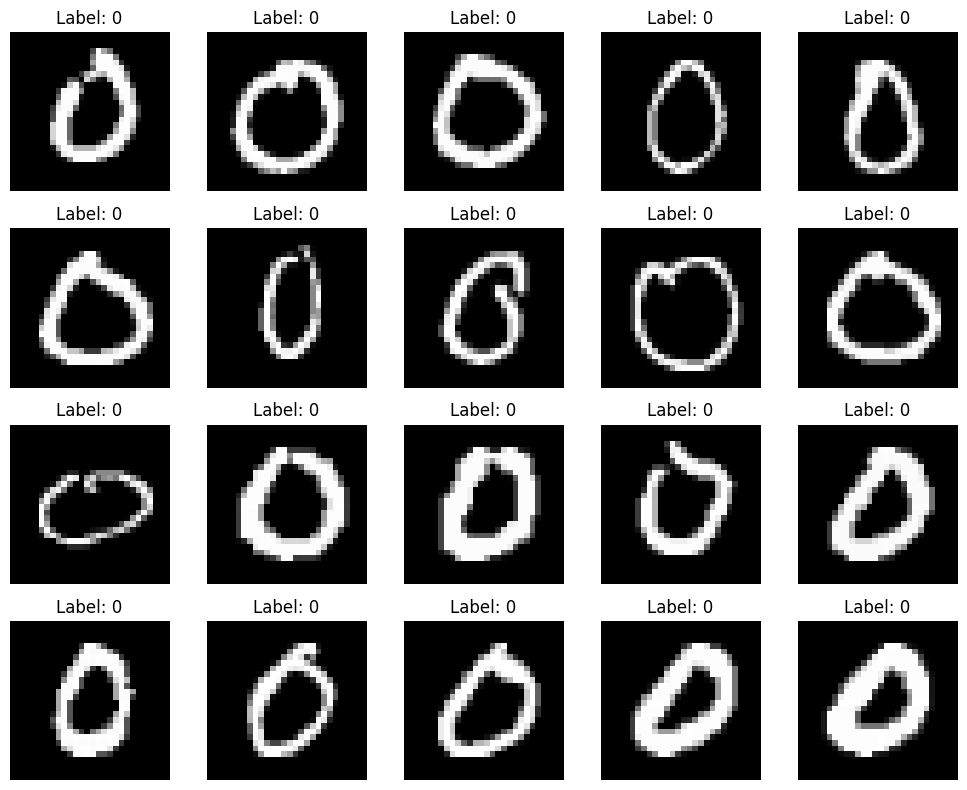

In [ ]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = scipy.io.loadmat("/content/mnist-original.mat")

# Extract features (images) and labels
X = data["data"].T  # Transpose to get (samples, features)
y = data["label"][0]  # Labels are stored in a row vector

# Print dataset shapes
print(f"Shape of X (images): {X.shape}")  # (70000, 784) → 70,000 images of 28x28 pixels
print(f"Shape of y (labels): {y.shape}")  # (70000,) → 70,000 labels

# Display the last 20 labels
print("\nLast 20 labels:", y[:20])

# Reshape and visualize the last 20 images
fig, axes = plt.subplots(4, 5, figsize=(10, 8))  # 4 rows, 5 columns

for i, ax in enumerate(axes.flat):
    img_index = 20 + i  # Get the last 20 images from the dataset
    ax.imshow(X[img_index].reshape(28, 28), cmap="gray")  # Reshape 784 features into 28x28
    ax.set_title(f"Label: {int(y[img_index])}")
    ax.axis("off")

plt.tight_layout()
plt.show()



Last 20 labels: [9. 9. 9. 9. 9. 9. 9. 9. 9. 9. 9. 9. 9. 9. 9. 9. 9. 9. 9. 9.]


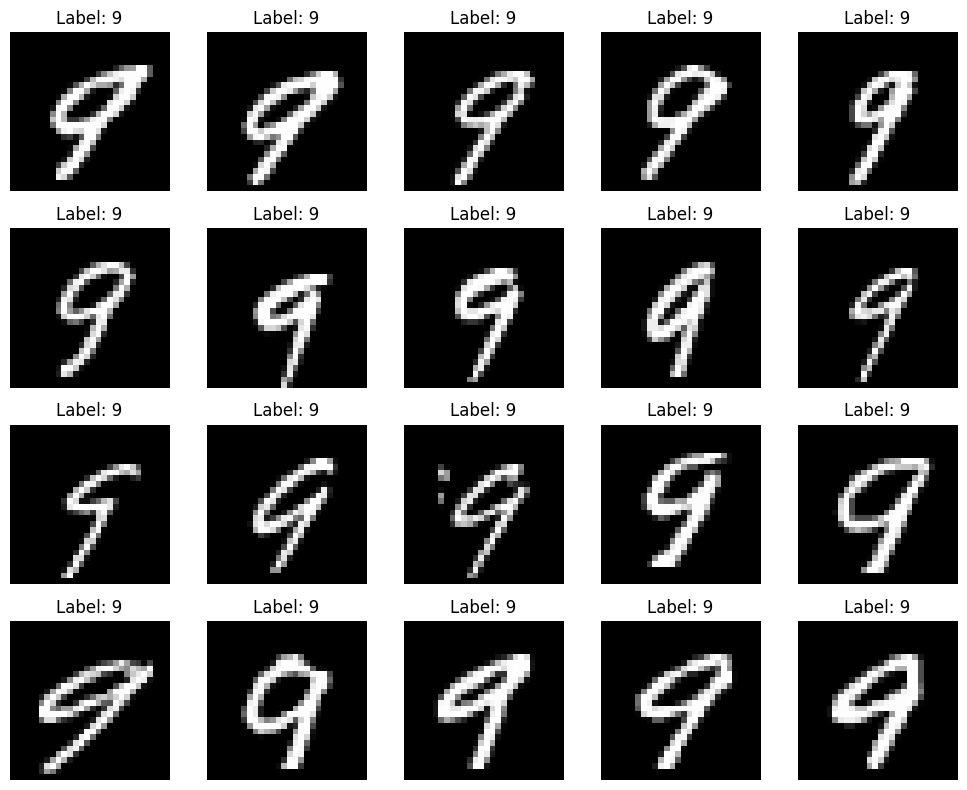

In [ ]:
# Display the last 20 labels
print("\nLast 20 labels:", y[-20:])

# Reshape and visualize the last 20 images
fig, axes = plt.subplots(4, 5, figsize=(10, 8))  # 4 rows, 5 columns

for i, ax in enumerate(axes.flat):
    img_index = -20 + i  # Get the last 20 images from the dataset
    ax.imshow(X[img_index].reshape(28, 28), cmap="gray")  # Reshape 784 features into 28x28
    ax.set_title(f"Label: {int(y[img_index])}")
    ax.axis("off")

plt.tight_layout()
plt.show()


# Extract Features and Labels

In [ ]:
X = data['data']  # Feature matrix
X = X.transpose()
y = data['label']  # Labels
y = y.flatten()

# Convert labels to categorical format (One-hot encoding)
y = tf.keras.utils.to_categorical(y, num_classes=10)

# Normalize the pixel values (assuming grayscale images)
X = X / 255.0

# Reshape to match TensorFlow input requirements (Flattening might not be needed)
X = X.reshape(X.shape[0], 28, 28, 1)


# Split Data into Training and Testing Sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the Neural Network Model

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),  # Flatten image to 1D
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes (digits 0-9)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Compile the Model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Train the Model

In [ ]:

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8750 - loss: 0.4345 - val_accuracy: 0.9596 - val_loss: 0.1364
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9670 - loss: 0.1097 - val_accuracy: 0.9673 - val_loss: 0.1127
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9776 - loss: 0.0735 - val_accuracy: 0.9735 - val_loss: 0.0895
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9837 - loss: 0.0531 - val_accuracy: 0.9689 - val_loss: 0.1055
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9875 - loss: 0.0385 - val_accuracy: 0.9746 - val_loss: 0.0889
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9903 - loss: 0.0303 - val_accuracy: 0.9721 - val_loss: 0.0997
Epoch 7/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9911 - loss: 0.0256 - val_accuracy: 0.9726 - val_loss: 0.1083
Epoch 8/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9930 - loss: 0.0209

# Evaluate the Model

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9779 - loss: 0.1030
Test Accuracy: 97.79%


# Visualize Accuracy and Loss

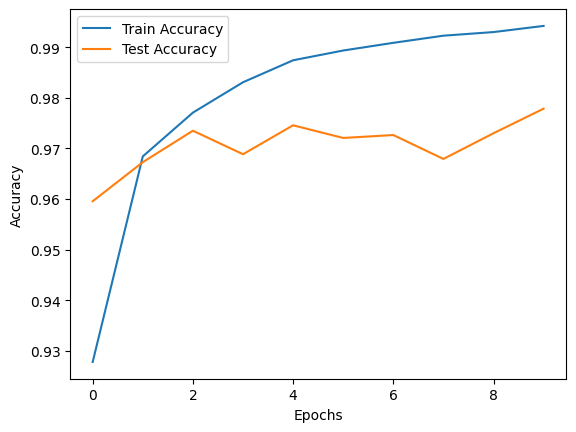

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Test on a New Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


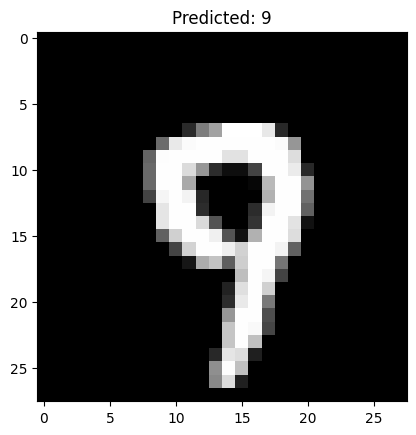

In [ ]:
def predict_sample(index):
    sample = X_test[index].reshape(1, 28, 28, 1)
    prediction = np.argmax(model.predict(sample))

    plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {prediction}")
    plt.show()

predict_sample(197)  # Change index to test different images


# Save the model

In [ ]:
model.save("handwritten_digit_model.h5")
